## Team Members - Group 4
**Jiho Jun - 9080800**  
**Edwin Lopez - 9055061**  
**Vishnu Sivaraj - 9025320**  

# K-Means Workshop — Sales Clustering (1D)

This notebook loads the provided retail dataset, performs quick EDA, and applies **K-Means** to the **`Sales(=Price)`** column.  
We follow the typical steps: 

1) Load & clean data  
2) **Assign N centroids**  
3) **Cluster the samples**  
4) **Add the variations** (recompute centroids)  
5) **Repeat K times** (iterate until convergence; we’ll also try **K=3**)


In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the uploaded Excel file
path = "data/Retail-Supply-Chain-Sales-Dataset.xlsx"

# Try to read first sheet automatically
xlsx = pd.ExcelFile(path)
df = pd.read_excel(path, sheet_name=xlsx.sheet_names[0])

print("File:", path)
print("Sheets:", xlsx.sheet_names)
print("Shape:", df.shape)
df.head(10)

File: data/Retail-Supply-Chain-Sales-Dataset.xlsx
Sheets: ['Retails Order Full Dataset', 'Calendar Table']
Shape: (9994, 23)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Anna Andreadi,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,Not,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Anna Andreadi,OFF-AR-10002833,Office Supplies,Art,Newell 322,Not,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Anna Andreadi,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,Not,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Anna Andreadi,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,Not,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Anna Andreadi,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,Not,114.9000,5,0.00,34.4700


## Data Cleaning
- Search missing value and if there is missing value drop it

In [3]:
# Check for missing values in 'Price'
print("Missing values in Sales:", df['Sales'].isnull().sum())

# Drop rows with missing Price values
df_clean = df.dropna(subset=['Sales'])

Missing values in Sales: 0


## Quick EDA

We do a compact exploratory pass to understand the `Sales` distribution and data quality:
- shape, columns, dtypes
- missing values
- descriptive statistics
- simple histogram of `Sales`



## 1) 50-word Summary — How Clustering Applies to the Term Project

### Business Objective and Use Case for K-Means Clustering

With the 'Sales' column, we focus on the business objective of grouping products into pricing segments to support pricing strategy and marketing decisions. This helps the business identify:

- **Low-priced products** that sell frequently  
- **Mid-range products** that drive steady revenue  
- **High-priced premium products** with profitable margins  

K-Means clustering enables segmentation of products based on price, allowing targeted marketing and optimized pricing strategies.

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Retail Sales People', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales', 'Quantity', 'Discount', 'Profit']

Dtypes:
 Row ID                          int64
Order ID                       object
Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Customer ID                    object
Customer Name                  object
Segment                        object
Country                        object
City                           object
State                          object
Postal Code                     int64
Region                         object
Retail Sales People            object
Product ID                     object
Category                       object
Sub-Category                   object
Product Name                   object
Re

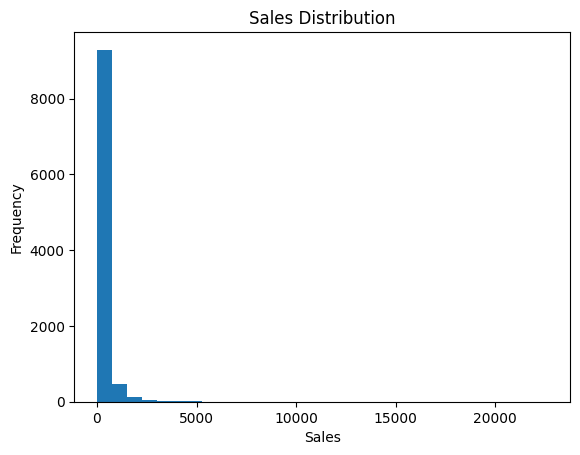

In [4]:
# EDA Overview
print("Columns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

# Try to guess the sales column: prefer 'Sales' (case-insensitive) then any similar name
sales_col = None
for c in df.columns:
    if str(c).strip().lower() == "sales":
        sales_col = c
        break
if sales_col is None:
    # try close matches
    candidates = [c for c in df.columns if "sale" in str(c).lower() or "revenue" in str(c).lower()]
    sales_col = candidates[0] if candidates else None

print("\nChosen sales column:", sales_col)

# Basic stats
if sales_col is not None:
    sales = pd.to_numeric(df[sales_col], errors="coerce")
    desc = sales.describe()
    print("\nDescriptive stats for", sales_col, ":", desc, sep="\n")
else:
    raise ValueError("Could not find a column named 'Sales'. Please rename the target column to 'Sales'.")


# Histogram
sales_clean = sales.dropna()
plt.figure()
plt.hist(sales_clean, bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Build X from the Sales column
# 1) Pick the sales column
sales_col = None
for c in df.columns:
    if str(c).strip().lower() == "sales":
        sales_col = c
        break
if sales_col is None:
    candidates = [c for c in df.columns if "sale" in str(c).lower() or "revenue" in str(c).lower()]
    if not candidates:
        raise ValueError("Could not find a column named 'Sales'.")
    sales_col = candidates[0]

# 2) Coerce to numeric and drop NAs
sales = pd.to_numeric(df[sales_col], errors="coerce")
sales_clean = sales.dropna()

# 3) Make 2D array for sklearn
X = sales_clean.values.reshape(-1, 1)

### Descriptive Statistics
Use the `describe()` function to summarize the central tendency, dispersion, and shape of the 'Sales' distribution.

In [5]:
print(df['Sales'].describe())


count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


## K-Means Loop
**1. Plot the data**  
**2. Assign N centroids**: Pick K starting centers (random or smart init).  
**3. Cluster the samples**: Assign each sample to the nearest centroid.  
**4. Add the variations**: Recompute each centroid as the mean of its assigned points.  
**5. Repeat K times**: Iterate steps 3–4 until assignments stabilize (we’ll also examine **K=3**).

**What happens with “added variations” as you increase K?**  
Within-cluster variance drops (tight clusters), between-cluster variance rises (more splits).  
Past a point, extra clusters overfit noise. We’ll use the elbow and silhouette to choose a reasonable K.


## Apply K-Means with **K=3**

We fit a 3-cluster model on `Sales`. Then we review cluster centers and segment sizes.


Cluster centers (sorted): [np.float64(134.20095823851665), np.float64(1774.6036934291583), np.float64(10608.891066666667)]
Cluster sizes (by label 0..K-1): {0: 9492, 1: 487, 2: 15}


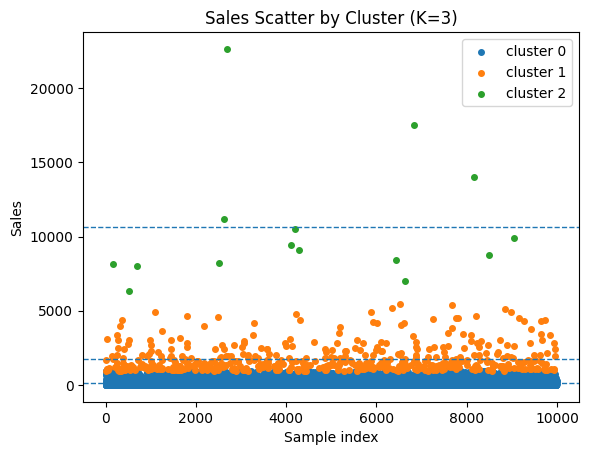

In [6]:
K = 3
kmeans = KMeans(n_clusters=K, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X)

df_clusters = df.loc[sales_clean.index].copy()
df_clusters["Sales"] = sales_clean.values
df_clusters["cluster"] = labels

centers = sorted(kmeans.cluster_centers_.flatten())
sizes = df_clusters["cluster"].value_counts().sort_index().tolist()

print("Cluster centers (sorted):", centers)
print("Cluster sizes (by label 0..K-1):", df_clusters["cluster"].value_counts().sort_index().to_dict())

import numpy as np
plt.figure()
x_idx = np.arange(len(sales_clean))
for cl in range(K):
    mask = (labels == cl)
    plt.scatter(x_idx[mask], sales_clean.values[mask], label=f"cluster {cl}", s=16)
# Add horizontal lines for cluster centers
for c_val in sorted(kmeans.cluster_centers_.flatten()):
    plt.axhline(c_val, linestyle="--", linewidth=1)
plt.title("Sales Scatter by Cluster (K=3)")
plt.xlabel("Sample index")
plt.ylabel("Sales")
plt.legend()
plt.show()

## 2) 50-word Summary — K-Means Results

With K=3, sales cluster into clear demand tiers: low (~134.20), mid (~1,774.60), and high (~10,608.89).  
 - cluster0: Most items are low-demand (cluster0≈95%, 9,492)  
 - cluster1: A smaller mid segment exists (≈4.9%, 487)
 - cluster2: A rare high tier emerges (≈0.2%, 15).   
 
Segmentation supports targeted pricing, stock policies, and tailored forecasting, reducing intra-cluster variance.



### Key Questions
1. **Best value of K**: Use the elbow (inertia) and silhouette (≥2) together—pick the smallest K near the elbow with a strong silhouette and stable centers; sanity-check with domain constraints.
2. **When does the algorithm stop?**: sklearn’s KMeans stops automatically when a convergence condition is met (noting changes)
if we want to change it we can change the code  
kmeans = KMeans(n_clusters=3, tol=1e-5, max_iter=500, n_init="auto", random_state=42)
3. **What if it's 2D, 3D, 4D, or higher dimensional?**: K-Means works in any dimension; standardize features, and consider PCA/UMAP for visualization—beware the curse of dimensionality and remove/reduce irrelevant features. If the dimension is too large the runtime will be too long.